<a href="https://colab.research.google.com/github/okeimanu/NUS-SDS-Datathon-Champion-team-296/blob/main/NUS_DATATHON_CHAMPION_GROUP_296.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [50]:
#%pip install pandas
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [51]:
# Can have as many cells as you want for code
filepath = "./data/catA_train.csv"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

In [52]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [53]:
import os

# Path to the desired working directory
new_directory = "/content/drive/MyDrive/"

# Change the current working directory to new_directory
os.chdir(new_directory)


### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# 1. Data Preparation

## 1.1 Preparing data

In [54]:
# df1 = pd.read_csv('/content/drive/MyDrive/catA_train.csv')

# read the csv file
df1 = pd.read_csv(filepath)
df1.head()

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,NaN,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.0,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.0,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.0,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.0,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0


In [55]:
# find the number of rows and columns in our dataset
print(df1.shape)

# find the names of columns in our dataset
print(df1.columns)

(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')


In [56]:
# get information about our dataframe
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [57]:
# determine percentage of missing values
total = df1.isna().sum().sort_values(ascending=False)
percent_missing = df1.isna().sum().sort_values(ascending = False)*100 / len(df1)
missing_data = pd.concat([total, percent_missing], axis=1, keys = ['Total', 'Percent'])
print(missing_data)

                                     Total     Percent
Square Footage                       29182  100.000000
Import/Export Status                 22569   77.338770
Fiscal Year End                      22445   76.913851
Employees (Single Site)              12403   42.502227
Employees (Global Ultimate Total)     2774    9.505860
Domestic Ultimate Company             1035    3.546707
Global Ultimate Country                523    1.792201
Parent Country                         520    1.781920
Global Ultimate Company                514    1.761360
Parent Company                         514    1.761360
Year Found                             434    1.487218
LONGITUDE                              120    0.411212
LATITUDE                               120    0.411212
Employees (Domestic Ultimate Total)     79    0.270715
Company Description                      0    0.000000
Ownership Type                           0    0.000000
Company Status (Active/Inactive)         0    0.000000
Entity Typ

## 1.2 Processing Data

In [58]:
# removes rows without either lat or long coordinates
df1 = df1.dropna(subset=["LATITUDE", "LONGITUDE"])

In [59]:
# Remove rows where the Company Status is 'Inactive'
df1 = df1[df1['Company Status (Active/Inactive)'] == 'Active']

In [60]:
columns = df1.columns
count_unique = df1['SIC Code'].value_counts()
print(count_unique)

6719.0    7743
8742.0    1387
7371.0     774
4731.0     734
7389.0     692
          ... 
751.0        2
4613.0       2
2211.0       2
179.0        2
3085.0       1
Name: SIC Code, Length: 582, dtype: int64


In [61]:
# drop square footage
df1.drop('Square Footage', axis='columns', inplace=True)

In [62]:
# new feature being age of the company
df1['Age'] = 2024 - df1['Year Found']

In [63]:
df1['Import/Export Status_Missing'] = df1['Import/Export Status'].isna()
df2 = df1.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)", "Year Found","Global Ultimate Country"])

df2 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity Type')
df2 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership Type')
df2 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import/Export Status')

columns_to_drop = ["Company Status (Active/Inactive)", "Entity Type", "Import/Export Status", "Ownership Type","8-Digit SIC Code",'8-Digit SIC Description',"Company","AccountID",'Year Found',"Fiscal Year End",'Company Description','Global Ultimate Company','Domestic Ultimate Company','Parent Company','Parent Country','Industry']
df2 = df2.drop(columns=[col for col in columns_to_drop if col in df1.columns], errors='ignore')

In [64]:
df2.isna().sum()

LATITUDE                                       0
LONGITUDE                                      0
SIC Code                                       0
Employees (Single Site)                        0
Employees (Domestic Ultimate Total)            0
Employees (Global Ultimate Total)              0
Sales (Domestic Ultimate Total USD)            0
Sales (Global Ultimate Total USD)              0
Global Ultimate Country                        0
Is Domestic Ultimate                           0
Is Global Ultimate                             0
Age                                            0
Import/Export Status_Missing                   0
Entity Type_Branch                             0
Entity Type_Independent                        0
Entity Type_Parent                             0
Entity Type_Subsidiary                         0
Ownership Type_Non-Corporates                  0
Ownership Type_Nonprofit                       0
Ownership Type_Partnership                     0
Ownership Type_Priva

In [65]:
# Find the frequency of each industry
sic_code_frequency = df2['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 10  # Adjust this threshold based on your preference

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df2['SIC Code'] = df2['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df2['SIC Code'].value_counts()

# Display the updated DataFrame
print(sic_code_frequency1)

6719.0    2727
Others    1274
8742.0     637
7389.0     439
4731.0     427
          ... 
7539.0      10
7219.0      10
8734.0      10
3613.0      10
3544.0      10
Name: SIC Code, Length: 185, dtype: int64


In [66]:
# convert to str cus we dont want it to be trained as a numeric value
# Convert the entire column to a common data type (string in this case)
df2['SIC Code'] = df2['SIC Code'].astype(str)

In [67]:
from sklearn.preprocessing import LabelEncoder
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
df2['SIC Code'] = label_encoder.fit_transform(df2['SIC Code'])
df2["SIC Code"].unique()

array([ 44, 129, 184,  13, 131, 155, 156,  51,   2, 128,  41,  75, 135,
        83, 109,  96, 173,  72,  38,  47,  58, 180,  93,  77, 127, 126,
        40,  86,  76, 108, 124,  42, 148,  63, 151, 112,  52,  50, 176,
       136,  97, 182,  25, 158, 123, 147,  57,  98,  89,  55, 144, 157,
        65, 171, 153,  32, 116, 100,  12, 121, 150, 141,  35,   4, 130,
       152,  73, 179,  69, 115,  78, 168,  28, 177, 107, 183, 161,  79,
       111,  29,  64, 170,  17,  95,   7,  54,  68, 143,  53,  61,  99,
        90,   9, 102, 146, 172, 169, 118, 122,   0, 106,   5,  30, 181,
       125,  92,  49, 101,  56, 167,  70, 149,  59,  21,   8,  19,   1,
        34, 105,  22,  67,  26, 164, 139,  66,  16,  74,  39,  82, 117,
       140,  46, 162, 110, 134,  14, 113,  71,  80,  10,  62,  36,  15,
       163, 142,  20, 133, 166,  81,  37,  24, 175,  33, 103,  27, 174,
       145, 178,  18,  84, 160,  43, 119,   3, 114,  94, 132, 165,   6,
        91, 159,  87, 120,  31, 154,  45,  60, 137,  11, 138,  2

In [68]:
label_encoder = LabelEncoder()
df2['Global Ultimate Country'] = label_encoder.fit_transform(df2['Global Ultimate Country'])
df2["Global Ultimate Country"].unique()

array([46, 18, 10, 51, 13, 56, 26, 19, 17, 58, 55, 37, 31, 12,  1, 30,  9,
       16, 52, 21, 41, 20, 54,  2, 57,  7, 47, 22, 34, 49, 40, 15, 35, 23,
       14, 50, 33, 53, 44, 38, 42, 11, 45,  3, 27, 39,  8,  6,  5,  0, 36,
       32,  4, 24, 28, 43, 29, 48, 25])

# 2. EDA

In [69]:
# use of a correlation matrix to observe how variables in our dataset may be affected by others
numerical_df = df2.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Assuming correlation_matrix is your correlation matrix
correlation_df = pd.DataFrame(correlation_matrix)

# Print or use the correlation DataFrame as needed
correlation_df

,LATITUDE,LONGITUDE,SIC Code,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,Is Global Ultimate,Age
LATITUDE,1.000000,-0.050965,-0.108832,0.003432,0.005532,-0.020306,0.000560,-0.024273,-0.007458,0.012802,-0.000103,0.007311
LONGITUDE,-0.050965,1.000000,0.021476,-0.008510,0.013660,0.004157,-0.000852,0.004661,0.005340,-0.002084,0.015346,0.002078
SIC Code,-0.108832,0.021476,1.000000,-0.017600,0.014936,0.013727,-0.031781,-0.014993,0.049270,-0.000912,0.015306,-0.053230
Employees (Single Site),0.003432,-0.008510,-0.017600,1.000000,0.156102,0.006980,0.003281,0.001929,-0.001311,-0.011530,-0.001524,0.058039
Employees (Domestic Ultimate Total),0.005532,0.013660,0.014936,0.156102,1.000000,0.007877,0.016794,0.001649,0.032957,-0.036375,0.027434,0.033845
Employees (Global Ultimate Total),-0.020306,0.004157,0.013727,0.006980,0.007877,1.000000,-0.008424,0.629201,-0.079682,0.181040,-0.012645,0.012524
Sales (Domestic Ultimate Total USD),0.000560,-0.000852,-0.031781,0.003281,0.016794,-0.008424,1.000000,0.124502,-0.049462,-0.043062,-0.006426,-0.032779
Sales (Global Ultimate Total USD),-0.024273,0.004661,-0.014993,0.001929,0.001649,0.629201,0.124502,1.000000,-0.029330,0.180940,-0.016514,-0.000780
Global Ultimate Country,-0.007458,0.005340,0.049270,-0.001311,0.032957,-0.079682,-0.049462,-0.029330,1.000000,-0.334670,0.022319,0.015054
Is Domestic Ultimate,0.012802,-0.002084,-0.000912,-0.011530,-0.036375,0.181040,-0.043062,0.180940,-0.334670,1.000000,0.143231,-0.058460


<Axes: >

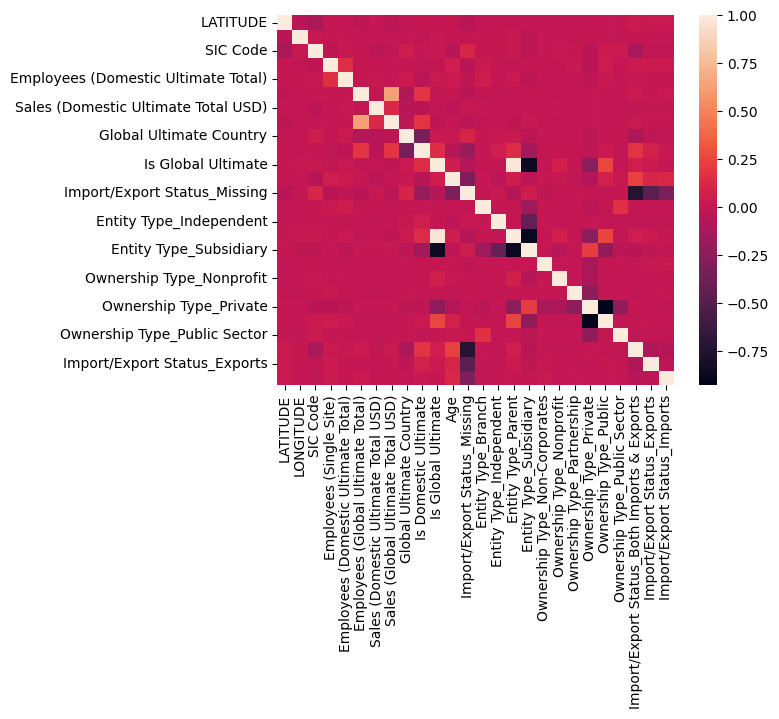

In [70]:
sns.heatmap(df2.corr())

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14082 entries, 1 to 29181
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   LATITUDE                                     14082 non-null  float64
 1   LONGITUDE                                    14082 non-null  float64
 2   SIC Code                                     14082 non-null  int64  
 3   Employees (Single Site)                      14082 non-null  float64
 4   Employees (Domestic Ultimate Total)          14082 non-null  float64
 5   Employees (Global Ultimate Total)            14082 non-null  float64
 6   Sales (Domestic Ultimate Total USD)          14082 non-null  float64
 7   Sales (Global Ultimate Total USD)            14082 non-null  float64
 8   Global Ultimate Country                      14082 non-null  int64  
 9   Is Domestic Ultimate                         14082 non-null  float64
 10

In [72]:
# import required libraries
import matplotlib.pyplot as plt

# we will need this for the color gradient representing how high the domestic sales figure is.
from matplotlib.colors import LogNorm
import seaborn as sns

# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = df1[df1['SIC Code'].isin([6719, 8742, 7371, 4731])] # top 4 industries with the most companies

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Age,Import/Export Status_Missing
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,31.0,True
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,18.0,True


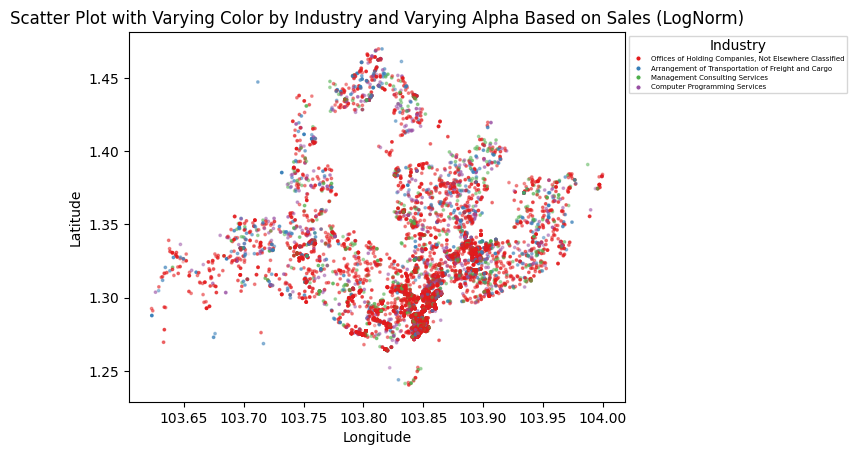

In [73]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

In [74]:
df1['SIC Code']

0        7361.0
1        4449.0
2        6719.0
3        6719.0
4        6719.0
          ...  
29177    6719.0
29178    6719.0
29179    6726.0
29180    6719.0
29181    5099.0
Name: SIC Code, Length: 29062, dtype: float64

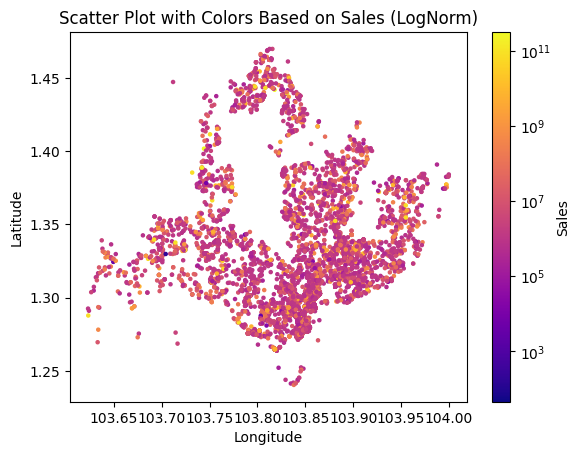

In [75]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

In [76]:
df2['Is Domestic Ultimate'] = df2['Is Domestic Ultimate'] == 1
df2['Is Global Ultimate'] = df2['Is Global Ultimate'] == 1

In [77]:
df2.head()

,LATITUDE,LONGITUDE,SIC Code,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Global Ultimate Country,Is Domestic Ultimate,...,Entity Type_Subsidiary,Ownership Type_Non-Corporates,Ownership Type_Nonprofit,Ownership Type_Partnership,Ownership Type_Private,Ownership Type_Public,Ownership Type_Public Sector,Import/Export Status_Both Imports & Exports,Import/Export Status_Exports,Import/Export Status_Imports
1,1.291294,103.827476,44,39.0,100.0,100.0,7.093536e+09,7.093536e+09,46,False,...,1,0,0,0,1,0,0,0,0,0
2,1.300144,103.857517,129,4.0,4.0,4.0,1.026308e+06,1.026308e+06,18,True,...,1,0,0,0,1,0,0,0,0,0
3,1.300785,103.791263,129,10.0,100.0,100.0,7.339898e+10,7.339898e+10,46,False,...,1,0,0,0,1,0,0,0,0,0
5,1.444773,103.812740,184,300.0,4.0,4.0,1.026308e+06,1.026308e+06,46,False,...,1,0,0,0,1,0,0,0,0,0
7,1.282887,103.850849,129,10.0,4.0,4.0,1.026308e+06,1.026308e+06,46,False,...,1,0,0,0,1,0,0,0,0,0


# 3. Model Training and Evaluation

In [78]:
df2 = df2.dropna(subset = ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)','Age'])

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14082 entries, 1 to 29181
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   LATITUDE                                     14082 non-null  float64
 1   LONGITUDE                                    14082 non-null  float64
 2   SIC Code                                     14082 non-null  int64  
 3   Employees (Single Site)                      14082 non-null  float64
 4   Employees (Domestic Ultimate Total)          14082 non-null  float64
 5   Employees (Global Ultimate Total)            14082 non-null  float64
 6   Sales (Domestic Ultimate Total USD)          14082 non-null  float64
 7   Sales (Global Ultimate Total USD)            14082 non-null  float64
 8   Global Ultimate Country                      14082 non-null  int64  
 9   Is Domestic Ultimate                         14082 non-null  bool   
 10

In [80]:
df2 = df2.dropna(subset = ["Entity Type_Branch","Entity Type_Independent","Entity Type_Parent","Entity Type_Subsidiary","Ownership Type_Non-Corporates","Ownership Type_Nonprofit","Ownership Type_Partnership","Ownership Type_Private","Ownership Type_Public","Ownership Type_Public Sector",'Import/Export Status_Both Imports & Exports','Import/Export Status_Exports','Import/Export Status_Imports'])

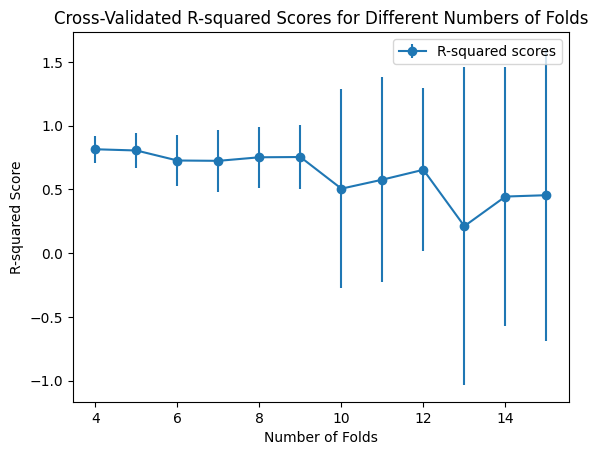

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt

# Separate features and target variable
X = df2.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df2['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


# Initialize the XGBoost Regressor with default parameters for initial cross-validation
initial_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(initial_model, X_train, y_train, cv=kf, scoring='r2')
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the initial cross-validation results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()



In [43]:
# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           cv=8,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator for making predictions
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model and get R-squared scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=8, scoring='r2')
print("Cross-Validation R-squared scores with best model:", cv_scores)
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print("Test R-squared score with best model:", test_score)

Fitting 8 folds for each of 243 candidates, totalling 1944 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.9}
Cross-Validation R-squared scores with best model: [0.96741205 0.88191007 0.24765698 0.90234569 0.84234101 0.73923437
 0.62522648 0.96916837]
Mean R-squared score: 0.7719118761584635
Standard Deviation of R-squared scores: 0.22600633551995056
Test R-squared score with best model: 0.9620634228706529


In [44]:
def adjusted_r2(r_squared, n, p):
    return 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors

# Assuming 'test_score' is your R-squared value for the test set
adjusted_r_squared_value = adjusted_r2(test_score, n, p)
print("Adjusted R-squared:", adjusted_r_squared_value)

Adjusted R-squared: 0.9617236111801357


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

**Save Model**

In [45]:
import joblib

train_model = best_model
# Save the base model to an HDF5 file
joblib.dump(train_model, 'base_model.h5')

['base_model.h5']

**Load Model**

In [46]:
def load_model():
  return joblib.load('base_model.h5')

In [47]:
loaded_model = load_model()

In [48]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''

    df1= hidden_data
    # removes rows without either lat or long coordinates
    df1 = df1.dropna(subset=["LATITUDE", "LONGITUDE"])
    # Remove rows where the Company Status is 'Inactive'
    df1 = df1[df1['Company Status (Active/Inactive)'] == 'Active']
    # drop company description
    df1 = df1.dropna(subset=["Company Description"])
    columns = df1.columns
    count_unique = df1['SIC Code'].value_counts()
    # drop square footage
    df1.drop('Square Footage', axis='columns', inplace=True)
    df1['Age'] = 2024 - df1['Year Found']


    df1['Import/Export Status_Missing'] = df1['Import/Export Status'].isna()
    df2 = df1.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)", "Year Found","Global Ultimate Country"])

    df2 = pd.get_dummies(df2, columns=['Entity Type'], prefix='Entity Type')
    df2 = pd.get_dummies(df2, columns=['Ownership Type'], prefix='Ownership Type')
    df2 = pd.get_dummies(df2, columns=['Import/Export Status'], prefix='Import/Export Status')

    columns_to_drop = ["Company Status (Active/Inactive)", "Entity Type", "Import/Export Status", "Ownership Type","8-Digit SIC Code",'8-Digit SIC Description',"Company","AccountID",'Year Found',"Fiscal Year End",'Company Description','Global Ultimate Company','Domestic Ultimate Company','Parent Company','Parent Country','Industry']
    df2 = df2.drop(columns=[col for col in columns_to_drop if col in df1.columns], errors='ignore')

    # Find the frequency of each industry
    sic_code_frequency = df2['SIC Code'].value_counts()

    # Set a threshold for low-frequency SIC Codes
    threshold = 10  # Adjust this threshold based on your preference

    # Identify SIC Codes with frequency below the threshold
    low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

    # Replace these low-frequency SIC Codes with a common label "Others"
    df2['SIC Code'] = df2['SIC Code'].replace(low_frequency_sic_codes, 'Others')

    sic_code_frequency1 = df2['SIC Code'].value_counts()

    # convert to str cus we dont want it to be trained as a numeric value
    # Convert the entire column to a common data type (string in this case)
    df2['SIC Code'] = df2['SIC Code'].astype(str)

    from sklearn.preprocessing import LabelEncoder
    # Use label encoding for 'SIC Code'
    label_encoder = LabelEncoder()
    df2['SIC Code'] = label_encoder.fit_transform(df2['SIC Code'])
    df2["SIC Code"].unique()

    label_encoder = LabelEncoder()
    df2['Global Ultimate Country'] = label_encoder.fit_transform(df2['Global Ultimate Country'])
    df2["Global Ultimate Country"].unique()

    df2['Is Domestic Ultimate'] = df2['Is Domestic Ultimate'] == 1
    df2['Is Global Ultimate'] = df2['Is Global Ultimate'] == 1

    df2 = df2.dropna(subset = ['Employees (Single Site)','Employees (Domestic Ultimate Total)','Employees (Global Ultimate Total)','Age'])

    df2 = df2.dropna(subset = ["Entity Type_Branch","Entity Type_Independent","Entity Type_Parent","Entity Type_Subsidiary","Ownership Type_Non-Corporates","Ownership Type_Nonprofit","Ownership Type_Partnership","Ownership Type_Private","Ownership Type_Public","Ownership Type_Public Sector",'Import/Export Status_Both Imports & Exports','Import/Export Status_Exports','Import/Export Status_Imports'])

    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(df2)

    result = predictions.tolist()
    return result


##### Cell to check testing_hidden_data function

In [49]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[6841569792.0, 179154208.0, 73527836672.0, 67986920.0, 2491532.25, 10318732.0, 40729472.0, 1323327488.0, 630668800.0, -20333848.0, -19210756.0, -55527704.0, 149563440.0, 11282155.0, 43116904.0, 36507592.0, 110881744.0, 10003959.0, 313610469376.0, -11602864.0, 266962880.0, -12929393.0, 32679520.0, -8583563.0, -7775133.0, 66819876.0, 125522744.0, 193811488.0, 56243612.0, 15343785.0, 106682752.0, 60100904.0, -13762636.0, 8641467.0, -20332404.0, 42777252.0, 31691238.0, 66663504.0, -74880736.0, 34742468.0, -22915440.0, -405363936.0, 1482045696.0, 318651392.0, 22480006.0, 126340480.0, 6884330496.0, 11780413440.0, -18411500.0, 14341218.0, 28553952.0, 29183328.0, -13911825.0, 1474358016.0, 147373552.0, -435045568.0, -43244876.0, -5129883.0, -14501072.0, -271799136.0, 28795022.0, 6702053888.0, 209247712.0, 209786528.0, 98653720.0, -19421734.0, -22863834.0, 303329984.0, 151380816.0, 95733648.0, -331358.125, -91932352.0, -11461046.0, -6591747.5, 14800637.0, 20588278.0, -63975972.0, -71972248.0, 1

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!